In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [2]:
#reading the dataset
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()
#datatypes all column are float,all are non-null
#so there ar eno missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#checking skewness
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

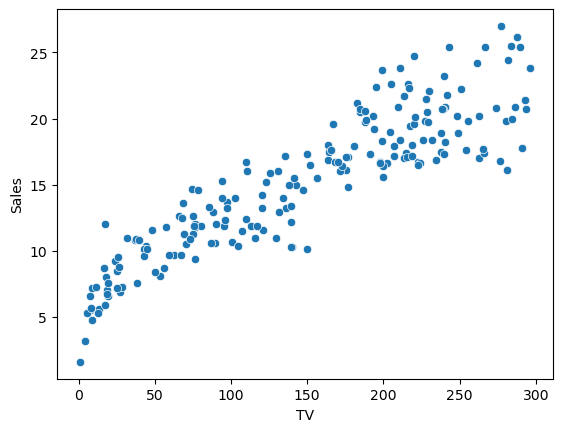

In [7]:
#vizsualization to check linear relationship
plt.figure()
sns.scatterplot(data=df,x="TV",y='Sales')
plt.show()

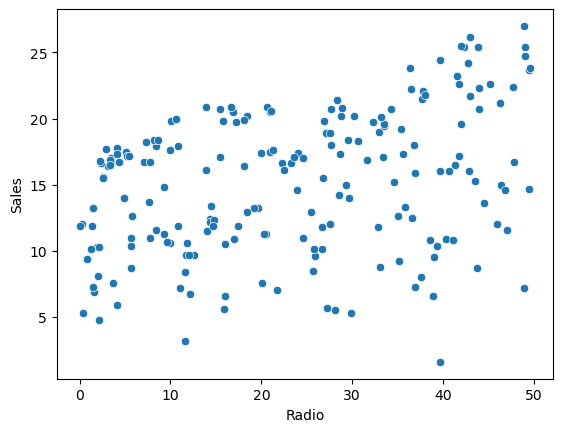

In [8]:
#checking linearity b/w newpaper and sales columns
plt.figure()
sns.scatterplot(data=df,x='Radio',y='Sales')
plt.show()

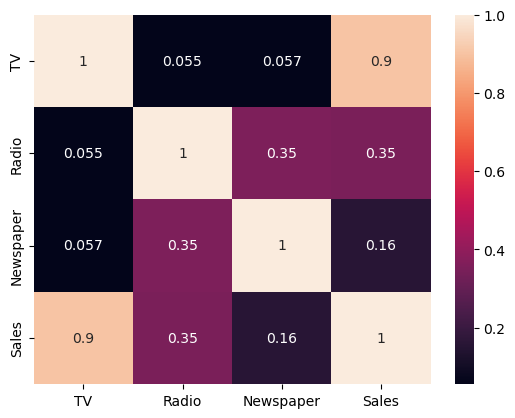

In [9]:
#heatmap to check correlations
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
X=df['TV']#feature
y=df['Sales']#target

In [11]:
#plit dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
#model: linear regression model
lr=LinearRegression() #object of lR class

In [13]:
#training the model
lr.fit(np.array(x_train).reshape(-1,1),y_train)
#As fit function accept 2D feature it was thorwing error since considering
#feature is 1D, so x_train is reshaped


LinearRegression()

In [14]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [15]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)

MSE: 5.143558863773589
RMSE: 2.267941547697733
MAE: 1.8623903650522302


In [16]:
r2=r2_score(y_test,y_pred)
r2

0.7984701565892567

In [17]:
#multiple linear regression

In [28]:
#features and target selection
X=df[['TV','Radio']]
y=df[['Sales']]

In [31]:
#splitting dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
#model
lr=LinearRegression()

In [32]:
#training the model
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
#ols
lr.intercept_

array([4.63900893])

In [34]:
lr.coef_

array([[0.05500479, 0.10164376]])

In [35]:
#testing with training dataset
y_pred=lr.predict(x_test)

In [36]:
#evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)
      

2.3645069433762345
1.5376953350310438
1.1919753277836755
0.9073562242286408


In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pf=PolynomialFeatures(2) #object of polinominal feature
#degree of x is 2

In [40]:
#selecting futures and target
X=df[['TV','Radio']]
y=df[['Sales']]

In [41]:
#spliting training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
#convert training testing data
X_train_poly=pf.fit_transform(x_train)
X_test_ploy=pf.transform(x_test)

In [43]:
#sales=TV thita1+radio thita2+TV**2 theta3+ratio**2 thita4+thita

In [45]:
#model building and training
lr=LinearRegression()
lr.fit(X_train_poly,y_train)

LinearRegression()

In [46]:
#testing
y_pred=lr.predict(X_test_ploy)

In [48]:
#evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [49]:
print(mse)
print(rmse)
print(mae)
print(r2)

1.4561026730447475
1.206690794298501
0.9476471686238791
0.9429484231714647
